In [1]:
import pandas as pd
from fastai.tabular import *
from fastai.callbacks import *

In [2]:
path = Path('../data')

In [3]:
df = pd.read_csv(path/'02_classification_split_urls.csv', error_bad_lines=False, index_col=0)

In [4]:
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26793,Travel & Tourism,Cornwall,West Briton and Cornwall Advertiser - transcri...,http://freepages.genealogy.rootsweb.ancestry.c...,http,"['freepages', 'genealogy', 'rootsweb', 'ancest...",freepages,genealogy,rootsweb,ancestry,com,NaN
26794,Travel & Tourism,Cornwall,West Cornwall Community Network,http://www.wccn.org.uk/,http,"['www', 'wccn', 'org', 'uk']",www,wccn,org,uk,NaN,NaN
26795,Travel & Tourism,Cornwall,West Penwith Resources,http://www.west-penwith.org.uk/,http,"['www', 'west-penwith', 'org', 'uk']",www,west-penwith,org,uk,NaN,NaN
26796,Travel & Tourism,Cornwall,Yeate Farm - the Granary self-catering accommo...,http://www.yeatefarm.co.uk/,http,"['www', 'yeatefarm', 'co', 'uk']",www,yeatefarm,co,uk,NaN,NaN


In [5]:
len(df.url3.unique())

279

In [6]:
df.url1.unique()

array(['www', 'architecturemps', 'news', 'projects', ..., 'devotedtotravel', 'wikitravel', 'walking',
       'specialolympicswales'], dtype=object)

In [7]:
sample = int(len(df)*0.3)
df_sample = df.sample(sample)
df_sample['is_valid'] = True
df['is_valid'] = False
dfs = [df, df_sample]
df = pd.concat(dfs)
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6,is_valid
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN,False
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN,False
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN,False
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN,False
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22885,Society & Culture,Communities,Critical Approaches to Discourse Analysis Acro...,http://cadaad.net/,http,"['cadaad', 'net']",cadaad,net,NaN,NaN,NaN,NaN,True
11177,Education & Research,Higher Education,SALAMI - Shared Aggregation of LAbour Market I...,http://www.nottingham.ac.uk/eportfolio/salami,http,"['www', 'nottingham', 'ac', 'uk']",www,nottingham,ac,uk,NaN,NaN,True
14513,"Government, Law & Politics",Political Parties,"Camborne, Redruth and Hayle Liberal Democrats",http://crhlibdems.org/,http,"['crhlibdems', 'org']",crhlibdems,org,NaN,NaN,NaN,NaN,True
2531,Arts & Humanities,Literature,She Also Wrote Plays,http://www.susan.croft.btinternet.co.uk/,http,"['www', 'susan', 'croft', 'btinternet', 'co', ...",www,susan,croft,btinternet,co,uk,True


In [8]:
df.to_csv(path/'03_classification_valid_train.csv')

## Drop 

In [9]:
df = df.drop(['URL','Secondary Category', 'netloc', 'Title','url2'],axis=1)

In [10]:
df

,Primary Category,scheme,url1,url3,url4,url5,url6,is_valid
0,Arts & Humanities,http,www,com,NaN,NaN,NaN,False
1,Arts & Humanities,http,www,co,uk,NaN,NaN,False
2,Arts & Humanities,http,www,com,NaN,NaN,NaN,False
3,Arts & Humanities,http,www,org,uk,NaN,NaN,False
4,Arts & Humanities,http,www,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...
22885,Society & Culture,http,cadaad,NaN,NaN,NaN,NaN,True
11177,Education & Research,http,www,ac,uk,NaN,NaN,True
14513,"Government, Law & Politics",http,crhlibdems,NaN,NaN,NaN,NaN,True
2531,Arts & Humanities,http,www,croft,btinternet,co,uk,True


In [11]:
df = df.reset_index(drop=True)

In [12]:
procs = [Categorify, FillMissing, Normalize]

In [13]:
dep_var = 'Primary Category'
cat_names = ['scheme', 
            'url1','url3','url4','url5','url6']



In [14]:
data_tab = (TabularList.from_df(df,cat_names=cat_names, procs=procs)
            .split_from_df('is_valid')
            .label_from_df('Primary Category')
            .databunch(bs=32))

In [15]:
data_tab.show_batch()

scheme,url1,url3,url4,url5,url6,target
http,www,co,uk,#na#,#na#,Travel & Tourism
http,www,co,uk,#na#,#na#,Medicine & Health
http,news,co,uk,#na#,#na#,Society & Culture
http,www,org,uk,#na#,#na#,Religion
http,www,org,#na#,#na#,#na#,"Business, Economy & Industry"


In [16]:
data_tab.c

24

In [18]:
def calcHiddenLayer(data, alpha, numHiddenLayers):
    tempData = data.train_ds
    i, o = len(tempData.x.classes), len(tempData.y.classes)
    io = i+o
    return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers

In [19]:
tab_layers = calcHiddenLayer(data_tab,2,1)

In [20]:
loss = LabelSmoothingCrossEntropy()

In [21]:
learn_tab = tabular_learner(data_tab,loss_func=loss, layers=tab_layers, ps=[0.5], emb_drop=0.05, metrics=[accuracy])

learn_tab.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


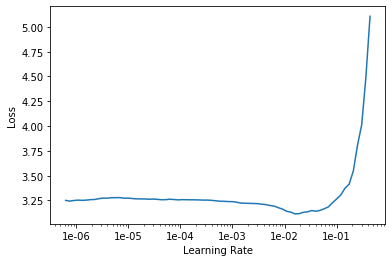

In [22]:
learn_tab.recorder.plot()

In [23]:
learn_tab.fit_one_cycle(30,max_lr=1e-02,
                        callbacks=[SaveModelCallback(learn_tab, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,time
0,2.383255,2.309633,0.300535,00:10
1,2.371637,2.283825,0.299167,00:11
2,2.402566,2.337043,0.294937,00:11
3,2.391634,2.303593,0.300411,00:10
4,2.367327,2.297189,0.301032,00:10
5,2.352238,2.328256,0.316208,00:10
6,2.329621,2.279399,0.315462,00:10
7,2.352203,2.311708,0.295435,00:10
8,2.340592,2.278293,0.303894,00:10
9,2.299178,2.322287,0.310486,00:11


Better model found at epoch 0 with accuracy value: 0.3005349040031433.
Better model found at epoch 4 with accuracy value: 0.3010324537754059.
Better model found at epoch 5 with accuracy value: 0.31620848178863525.
Better model found at epoch 10 with accuracy value: 0.3163328766822815.
Better model found at epoch 12 with accuracy value: 0.32926979660987854.
Better model found at epoch 21 with accuracy value: 0.3347431421279907.
Better model found at epoch 22 with accuracy value: 0.33573827147483826.
Better model found at epoch 29 with accuracy value: 0.336111456155777.


In [24]:
learn_tab.load('best')

Learner(data=TabularDataBunch;

Train: LabelList (26798 items)
x: TabularList
scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 ac; url4 uk; url5 #na#; url6 #na#; 
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TabularList
scheme http; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 leaderswedeserve; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 gov; url4 uk; url5 #na#; url6 #na#; 
y: CategoryList
Arts & Humanities,Digital Society,Society & Culture,Government, Law & Politics,M

In [26]:
learn_tab.path

PosixPath('.')

In [25]:
learn_tab.export('final_tab.pkl')

In [28]:
learn_tab = load_learner('.','final_tab.pkl')